# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [1]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

Using TensorFlow backend.


# 資料準備

In [2]:
(x_image_train, y_label_train), (x_image_test, y_label_test) = cifar100.load_data()

169009152/169001437 [==============================] - 90s 1us/step


In [3]:
x_image_train.shape

(50000, 32, 32, 3)

In [4]:
y_label_train.shape

(50000, 1)

In [5]:
x_image_test.shape

(10000, 32, 32, 3)

In [6]:
y_label_test.shape

(10000, 1)

In [21]:
y_label_test[:5]

array([[49],
       [33],
       [72],
       [51],
       [71]])

In [23]:
coarse_label = [
'apple', # id 0
'aquarium_fish',
'baby',
'bear',
'beaver',
'bed',
'bee',
'beetle',
'bicycle',
'bottle',
'bowl',
'boy',
'bridge',
'bus',
'butterfly',
'camel',
'can',
'castle',
'caterpillar',
'cattle',
'chair',
'chimpanzee',
'clock',
'cloud',
'cockroach',
'couch',
'crab',
'crocodile',
'cup',
'dinosaur',
'dolphin',
'elephant',
'flatfish',
'forest',
'fox',
'girl',
'hamster',
'house',
'kangaroo',
'computer_keyboard',
'lamp',
'lawn_mower',
'leopard',
'lion',
'lizard',
'lobster',
'man',
'maple_tree',
'motorcycle',
'mountain',
'mouse',
'mushroom',
'oak_tree',
'orange',
'orchid',
'otter',
'palm_tree',
'pear',
'pickup_truck',
'pine_tree',
'plain',
'plate',
'poppy',
'porcupine',
'possum',
'rabbit',
'raccoon',
'ray',
'road',
'rocket',
'rose',
'sea',
'seal',
'shark',
'shrew',
'skunk',
'skyscraper',
'snail',
'snake',
'spider',
'squirrel',
'streetcar',
'sunflower',
'sweet_pepper',
'table',
'tank',
'telephone',
'television',
'tiger',
'tractor',
'train',
'trout',
'tulip',
'turtle',
'wardrobe',
'whale',
'willow_tree',
'wolf',
'woman',
'worm',
]

In [24]:
import matplotlib.pyplot as plt

#宣告一個影像標記的函數
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25: num = 25
    for i in range(0,num):
        ax = plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title = str(i) + ',' + coarse_label[labels[i][0]]
        if len(prediction) > 0:
            title += '=>'+coarse_label[prediction[i]]
        ax.set_title(title)
        idx += 1
    plt.show()

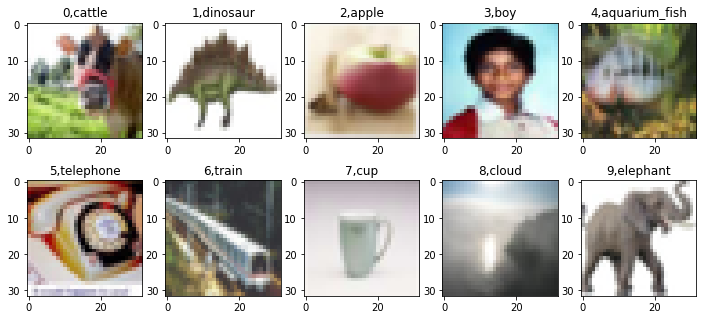

In [25]:
plot_images_labels_prediction(x_image_train,y_label_train,[],0)

# Image normalize 

In [30]:
x_image_train_normal = x_image_train/255
x_image_test_normal = x_image_test/255

In [31]:
x_image_test_normal[0]

array([[[0.78039216, 0.84313725, 0.97647059],
        [0.76862745, 0.82745098, 0.95686275],
        [0.76470588, 0.82352941, 0.95294118],
        ...,
        [0.84705882, 0.90588235, 0.98039216],
        [0.85098039, 0.90588235, 0.98039216],
        [0.87843137, 0.91764706, 0.98823529]],

       [[0.77254902, 0.82352941, 0.9372549 ],
        [0.76470588, 0.81568627, 0.93333333],
        [0.76470588, 0.82352941, 0.94117647],
        ...,
        [0.90588235, 0.95294118, 0.98039216],
        [0.91372549, 0.95294118, 0.98039216],
        [0.94509804, 0.96078431, 0.99215686]],

       [[0.87058824, 0.88627451, 0.96470588],
        [0.83529412, 0.8627451 , 0.94901961],
        [0.81960784, 0.85882353, 0.95294118],
        ...,
        [0.95294118, 0.98039216, 0.98431373],
        [0.95686275, 0.97647059, 0.98431373],
        [0.98039216, 0.98039216, 0.99215686]],

       ...,

       [[0.28235294, 0.28627451, 0.38823529],
        [0.27843137, 0.29019608, 0.4       ],
        [0.29019608, 0

# 轉換label 為OneHot Encoding

In [34]:
y_label_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [36]:
from keras.utils import np_utils

y_label_train_onehot = np_utils.to_categorical(y_label_train)
y_label_test_onehot = np_utils.to_categorical(y_label_test)

In [38]:
y_label_train_onehot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)